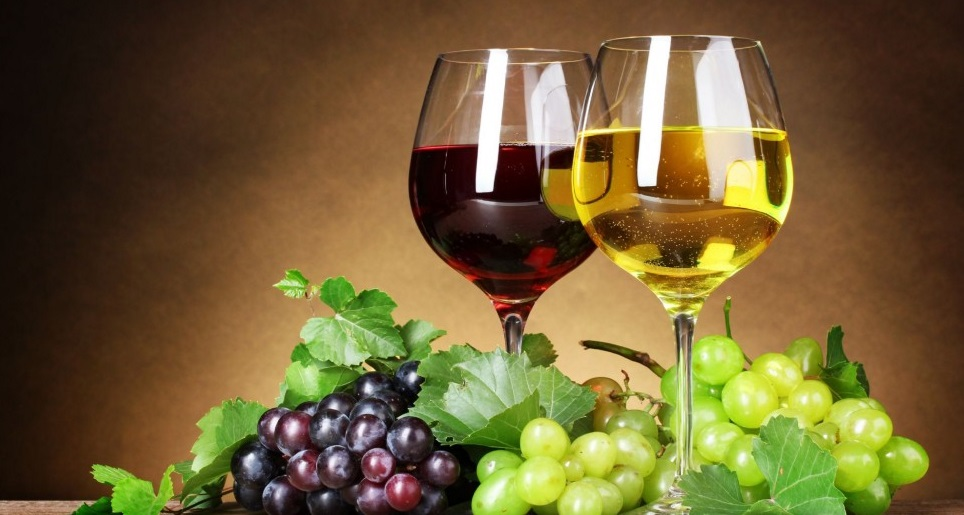

# BUSINESS UNDERSTANDING

In [1]:
# Case de dados para CLASSIFICAÇÃO
# Identificar o tipo de vinho de acordo com as características de vinho tinto e branco presente na base de dados

# DATA UNDERSTANDING

In [2]:
# IA -> MACHINE LEARNING
# MODELO SUPERVISIONADO -> MÉTODO CLASSIFICAÇÃO
# Dados disponibilizadas no kaggle para efeito de estudo sobre o tipo de vinho com base nas características

[Wine dataset](https://www.kaggle.com/datasets/dell4010/wine-dataset)

# Title

In [3]:
# Classificação de binhos tinto e branco

# Head

In [4]:
# estudando machine learning
# by geanclm em 20/02/2022 at 11:47h
# update by geanclm on 24/10/2023

# Local files

In [5]:
!dir

 O volume na unidade C ‚ Windows
 O N£mero de S‚rie do Volume ‚ 9241-82D4

 Pasta de C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning

04/11/2023  22:12    <DIR>          .
29/10/2023  16:48    <DIR>          ..
24/10/2023  09:36                68 .gitattributes
03/11/2023  22:07    <DIR>          .ipynb_checkpoints
04/11/2023  22:12           642.778 CLASSIFICA€ÇO_vinhos_csv.ipynb
24/10/2023  09:36             1.091 LICENSE
24/10/2023  09:36                50 README.md
01/11/2023  13:01           131.951 Vinho-Tinto-e-Vinho-Branco.jpg
31/10/2023  19:04        10.006.697 wine_classifier_etc.joblib
24/10/2023  09:36           384.016 wine_dataset.csv
               7 arquivo(s)     11.166.651 bytes
               3 pasta(s)   889.750.081.536 bytes dispon¡veis


# Library installation

In [6]:
# !pip install -U imbalanced-learn
# !pip install imblearn

# Import libs

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# balancemaneto dos dados em relação ao MAIOR valor de y
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# balancemaneto dos dados em relação ao MENOR valor de y
from imblearn.under_sampling import RandomUnderSampler

# Padronizar os dados
from sklearn.preprocessing import StandardScaler

# Normalizar os dados
from sklearn.preprocessing import MinMaxScaler

import joblib

# Load data

In [8]:
df = pd.read_csv(r'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\wine_dataset.csv')

In [9]:
df.sample(15).T

,1330,2797,2213,1170,18,3274,435,5012,4095,403,4103,1477,6268,2995,3887
fixed_acidity,7.4,7.1,7.5,9.2,7.4,6.2,12.3,6.7,8.6,11.4,8.5,5.3,5.9,7.3,7.4
volatile_acidity,0.6,0.26,0.21,0.36,0.59,0.27,0.39,0.21,0.23,0.6,0.3,0.47,0.44,0.18,0.33
citric_acid,0.26,0.32,0.68,0.34,0.08,0.32,0.63,0.48,0.25,0.49,0.28,0.11,0.33,0.29,0.26
residual_sugar,2.1,14.45,10.9,1.6,4.4,8.8,2.3,14.8,11.3,2.7,3.1,2.2,1.2,1.2,15.6
chlorides,0.083,0.074,0.045,0.062,0.086,0.047,0.091,0.05,0.031,0.085,0.054,0.048,0.049,0.044,0.049
free_sulfur_dioxide,17.0,29.0,38.0,5.0,6.0,65.0,6.0,31.0,13.0,10.0,54.0,16.0,12.0,12.0,67.0
total_sulfur_dioxide,91.0,107.0,133.0,12.0,29.0,224.0,18.0,195.0,96.0,41.0,174.0,89.0,117.0,143.0,210.0
density,0.99616,0.998,0.9978,0.99667,0.9974,0.9961,1.0004,0.99942,0.99645,0.9994,0.99543,0.99182,0.99134,0.9918,0.99907
pH,3.29,2.96,3.0,3.2,3.38,3.17,3.16,2.95,3.11,3.15,3.21,3.54,3.46,3.2,3.06
sulphates,0.56,0.42,0.36,0.67,0.5,0.47,0.49,0.75,0.4,0.63,0.43,0.88,0.44,0.48,0.68


# Exploratory Analysis

In [10]:
# filtrar dado específico do data frame
df.loc[0:4,'style']

0    red
1    red
2    red
3    red
4    red
Name: style, dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [12]:
df.dtypes[df.dtypes.values == 'object'].index

Index(['style'], dtype='object')

In [13]:
df.shape

(6497, 13)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulfur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [15]:
# verificação de existência de dados nulos
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64

In [16]:
# Em caso de haver dados nulos analisar melhor estratégia para a situação pontual

<Axes: >

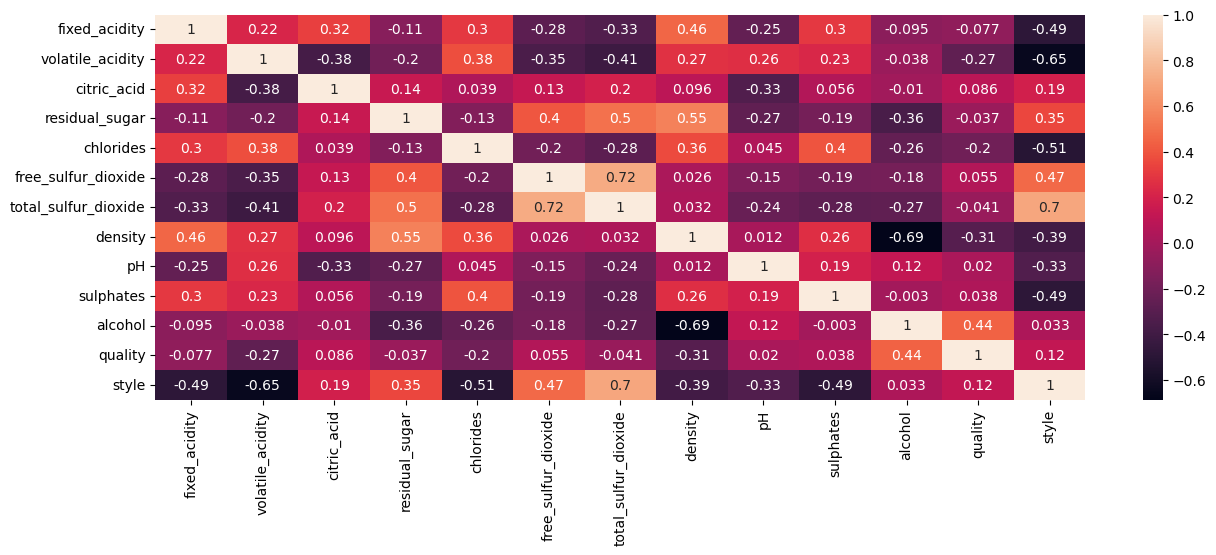

In [100]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)

<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            DATA PREPARATION
        </b>
    <br/>&nbsp;
</center>

In [17]:
df['style'] = df['style'].replace('red', 0)
df['style'] = df['style'].replace('white', 1)

In [18]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [19]:
# 1 - VERIFICAR NECESSIDADE DE APLICAR O GET DUMMIES para cada base de dados
# df_d = pd.get_dummies(df)
# df_d.sample(5)

# DATA VISUALIZATION

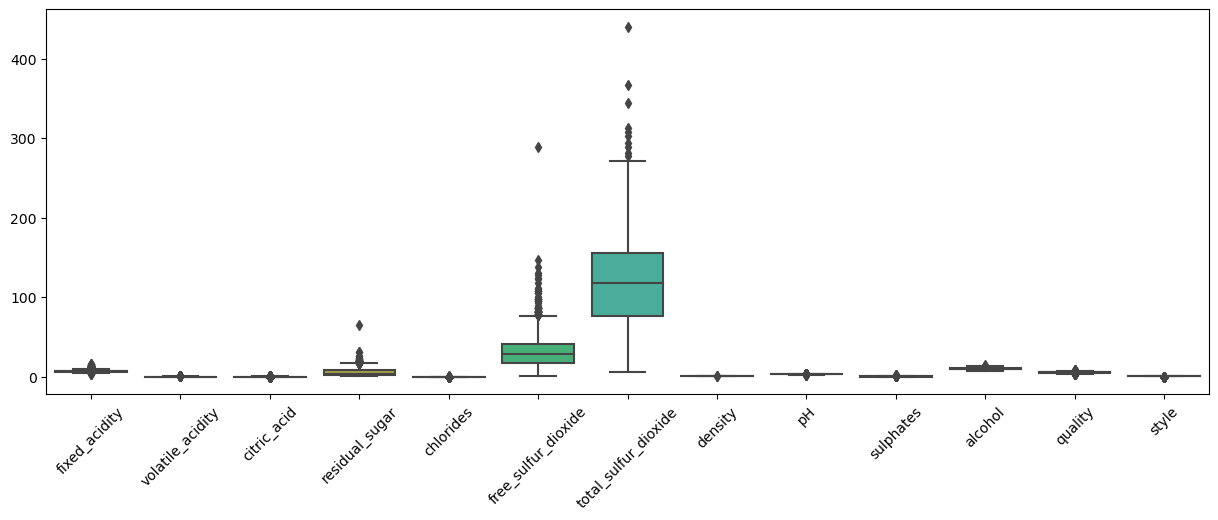

In [20]:
# Analisar os outliers
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show();

In [21]:
df['residual_sugar'].min(), df['residual_sugar'].max()

(0.6, 65.8)

In [22]:
# LIMITE INFERIOR E SUPERIOR DO BOX PLOT
q1 = df['residual_sugar'].quantile(0.25)
q2 = df['residual_sugar'].quantile(0.5)
q3 = df['residual_sugar'].quantile(0.75)
amplitude = q3 - q1
limite_inferior = q1 - (1.5 * amplitude)
limite_superior = q3 + (1.5 * amplitude)

limite_inferior, q1, q2, q3, limite_superior

(-7.6499999999999995, 1.8, 3.0, 8.1, 17.549999999999997)

In [23]:
(((df.loc[df['residual_sugar'] > limite_superior]).count()[0] / df['residual_sugar'].count())) * 100

1.816222872094813

In [24]:
# OUTLIERS NA COLUNA 'residual_sugar'
df.loc[df['residual_sugar'] > limite_superior]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
1599,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6,1
1606,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.80,6,1
1613,8.3,0.420,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.70,5,1
1637,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.60,5,1
1638,7.3,0.240,0.39,17.95,0.057,45.0,149.0,0.99990,3.21,0.36,8.60,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6290,6.9,0.190,0.31,19.25,0.043,38.0,167.0,0.99954,2.93,0.52,9.10,7,1
6293,6.9,0.190,0.31,19.25,0.043,38.0,167.0,0.99954,2.93,0.52,9.10,7,1
6347,6.1,0.340,0.24,18.35,0.050,33.0,184.0,0.99943,3.12,0.61,9.30,5,1
6348,6.2,0.350,0.25,18.40,0.051,28.0,182.0,0.99946,3.13,0.62,9.30,6,1


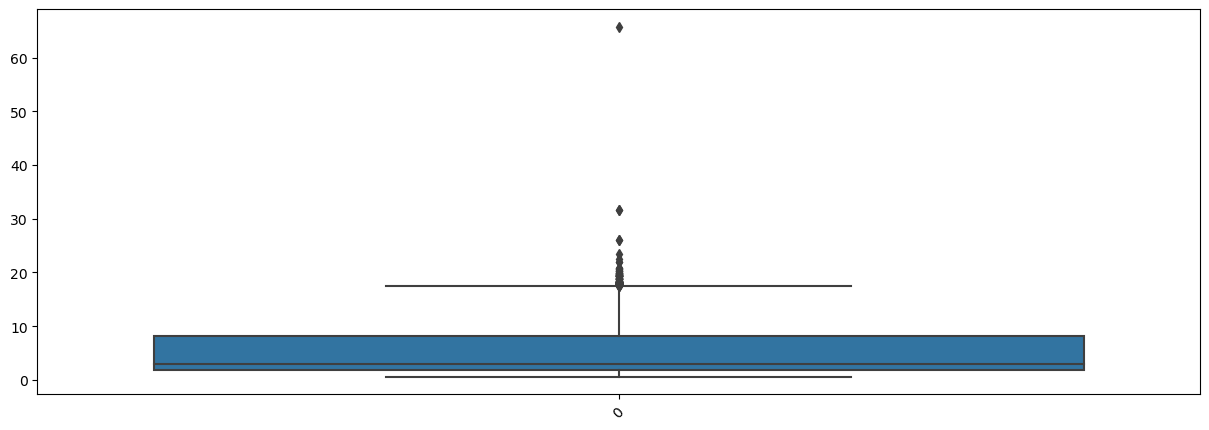

In [25]:
# Analisar os outliers
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df['residual_sugar'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show();

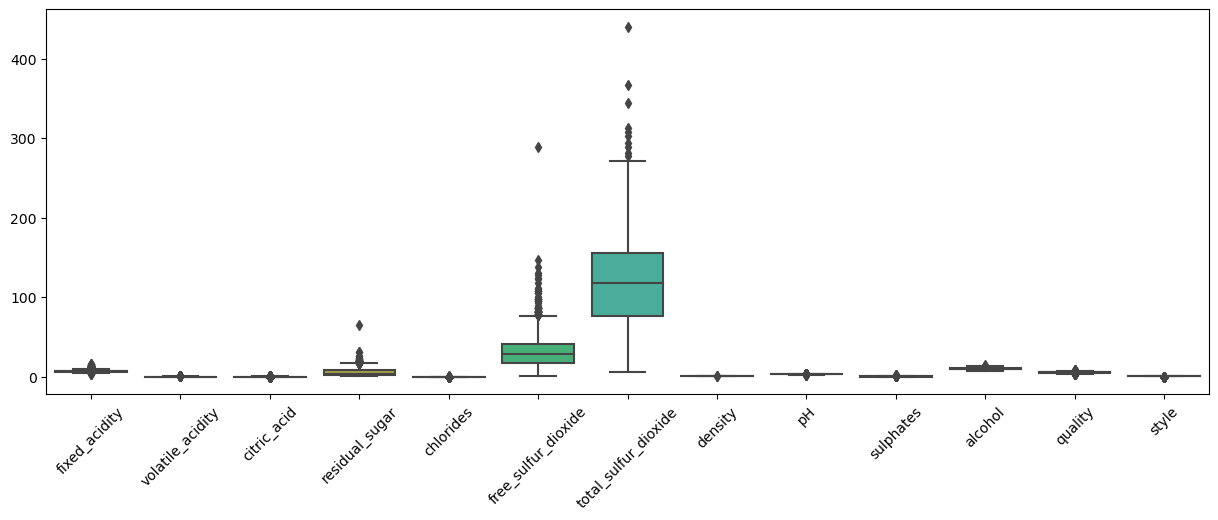

In [26]:
# Analisar os outliers
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show();

<center style="font-size:18pt; background-color:#0f79b6">
    <br/>
        <b style="color: #ffffff">
            MODELING
        </b>
    <br/>&nbsp;
</center>

In [27]:
# Divisão dos dados em X e y
X = df.drop('style', axis = 1)
y = df['style']
X.shape, y.shape

((6497, 12), (6497,))

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [29]:
df.groupby('style').size()[0], df.groupby('style').size()[1]

(1599, 4898)

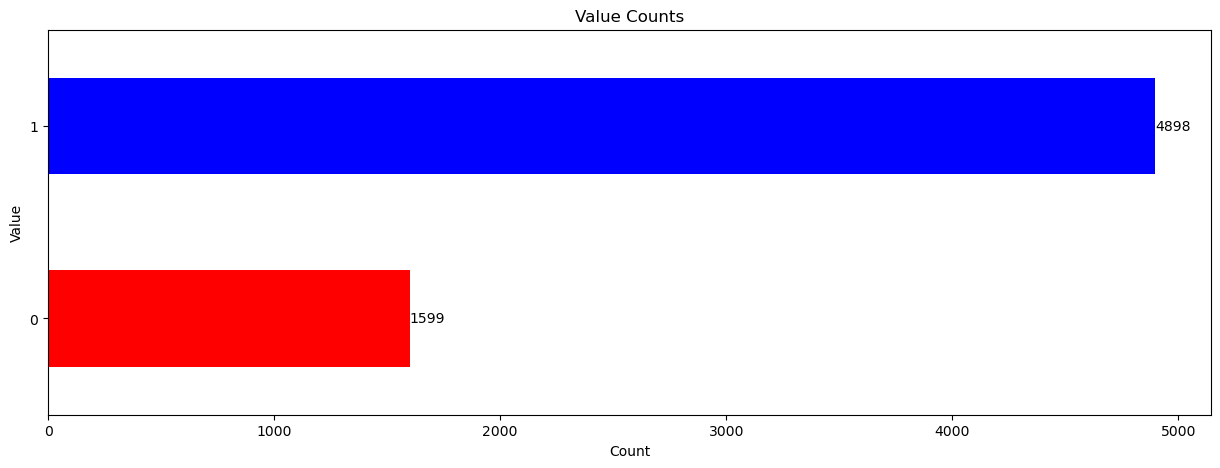

In [30]:
plt.figure(figsize=(15,5))
ax = y.value_counts(ascending=True).plot(kind ='barh', color = ['red','blue'])
ax.set_xlabel('Count')
ax.set_ylabel('Value')
ax.set_title('Value Counts')
ax.bar_label(ax.containers[0], label_type='edge');

In [31]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([1599, 4898], dtype=int64))

In [32]:
percentual_0 = np.bincount(y)[0] / len(y) * 100
percentual_1 = np.bincount(y)[1] / len(y) * 100
percentual_0, percentual_1

(24.611359088810218, 75.38864091118978)

# Data balancing

In [33]:
# OBSERVALÇÃO IMPORTANTE: CONFIRMAR EM QUE MOMENTO É O MAIS ADEQUADO PARA O BALANCEAMENTO DOS DADOS!
# OBSERVALÇÃO IMPORTANTE: CONFIRMAR EM QUE MOMENTO É O MAIS ADEQUADO PARA O BALANCEAMENTO DOS DADOS!
# OBSERVALÇÃO IMPORTANTE: CONFIRMAR EM QUE MOMENTO É O MAIS ADEQUADO PARA O BALANCEAMENTO DOS DADOS!

# balancemaneto dos dados com a geração de dados aleatórios na base minoritária de y
smote_ball = SMOTE()
X_bal, y_bal = smote_ball.fit_resample(X, y)

# balancemaneto dos dados com a remoção de dados da base majoritária de y
# rus = RandomUnderSampler()
# X_bal, y_bal = rus.fit_resample(X, y)

In [34]:
# y_bal.value_counts()

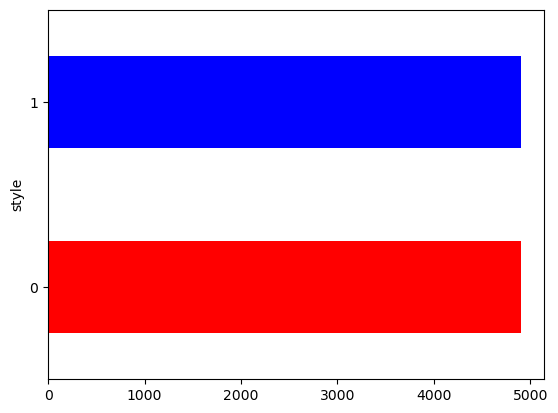

In [35]:
y_bal.value_counts(ascending=True).plot(kind = 'barh', color = ['red','blue']);

# Standardization

In [36]:
obj_padronizado = StandardScaler().fit(X_bal)
df_padronizado = obj_padronizado.transform(X_bal)
df_padronizado = pd.DataFrame(df_padronizado)
df_padronizado.columns = list(X_bal.columns)
df_padronizado.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,-0.121298,1.604294,-1.909990,-0.608295,0.232697,-0.847043,-0.975837,0.861627,1.648620,-0.085343,-0.943767,-0.809519
1,0.147665,2.579995,-1.909990,-0.440830,0.789723,-0.029549,-0.422780,0.504334,-0.315413,0.675224,-0.585718,-0.809519
2,0.147665,1.929528,-1.656396,-0.512601,0.637807,-0.613473,-0.640651,0.575792,0.064723,0.485083,-0.585718,-0.809519
3,2.433846,-0.672340,1.640336,-0.608295,0.207377,-0.496688,-0.540095,0.933085,-0.568836,0.041419,-0.585718,0.376903
4,-0.121298,1.604294,-1.909990,-0.608295,0.232697,-0.847043,-0.975837,0.861627,1.648620,-0.085343,-0.943767,-0.809519


In [37]:
df_padronizado.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,9796.0,1.276598e-16,1.000051,-2.541960,-0.659223,-0.230741,0.416627,5.594155
volatile_acidity,9796.0,9.284348e-17,1.000051,-1.756451,-0.780751,-0.238695,0.737005,6.374385
citric_acid,9796.0,-3.365576e-16,1.000051,-1.909990,-0.578618,-0.008030,0.617503,8.614191
residual_sugar,9796.0,9.284348e-17,1.000051,-0.919302,-0.608295,-0.488678,0.324724,14.678871
chlorides,9796.0,-2.437141e-16,1.000051,-1.463702,-0.602843,-0.172413,0.359293,13.778564
free_sulfur_dioxide,9796.0,9.284348e-17,1.000051,-1.430966,-0.788650,-0.175243,0.556823,15.386040
total_sulfur_dioxide,9796.0,-2.321087e-17,1.000051,-1.445098,-0.924126,-0.037316,0.733612,5.828439
density,9796.0,-3.574474e-14,1.000051,-2.957836,-0.680803,0.147041,0.700845,15.574957
pH,9796.0,7.775641e-16,1.000051,-3.356495,-0.695548,-0.009177,0.698282,4.816415
sulphates,9796.0,-8.936185e-16,1.000051,-2.240283,-0.655768,-0.105375,0.485083,9.041463


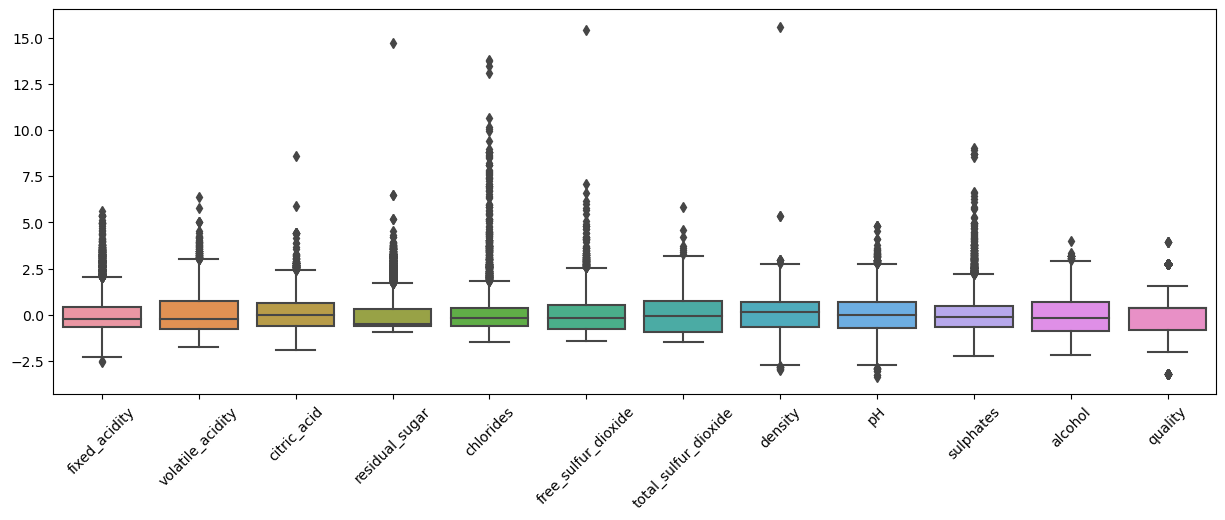

In [38]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df_padronizado)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Normalization

In [39]:
obj_normalizado = MinMaxScaler().fit(X_bal)
df_normalizado = obj_normalizado.transform(X_bal)
df_normalizado = pd.DataFrame(df_normalizado)
df_normalizado.columns = list(X_bal.columns)
df_normalizado.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333


In [40]:
df_normalizado.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,9796.0,0.312429,0.122915,0.0,0.231405,0.284069,0.363636,1.0
volatile_acidity,9796.0,0.216023,0.122995,0.0,0.120000,0.186667,0.306667,1.0
citric_acid,9796.0,0.181486,0.095024,0.0,0.126506,0.180723,0.240161,1.0
residual_sugar,9796.0,0.058937,0.064113,0.0,0.019939,0.027607,0.079755,1.0
chlorides,9796.0,0.096029,0.065610,0.0,0.056478,0.084718,0.119601,1.0
free_sulfur_dioxide,9796.0,0.085090,0.059467,0.0,0.038194,0.074670,0.118201,1.0
total_sulfur_dioxide,9796.0,0.198679,0.137492,0.0,0.071626,0.193548,0.299539,1.0
density,9796.0,0.159600,0.053961,0.0,0.122865,0.167534,0.197417,1.0
pH,9796.0,0.410685,0.122362,0.0,0.325581,0.409563,0.496124,1.0
sulphates,9796.0,0.198576,0.088643,0.0,0.140449,0.189236,0.241573,1.0


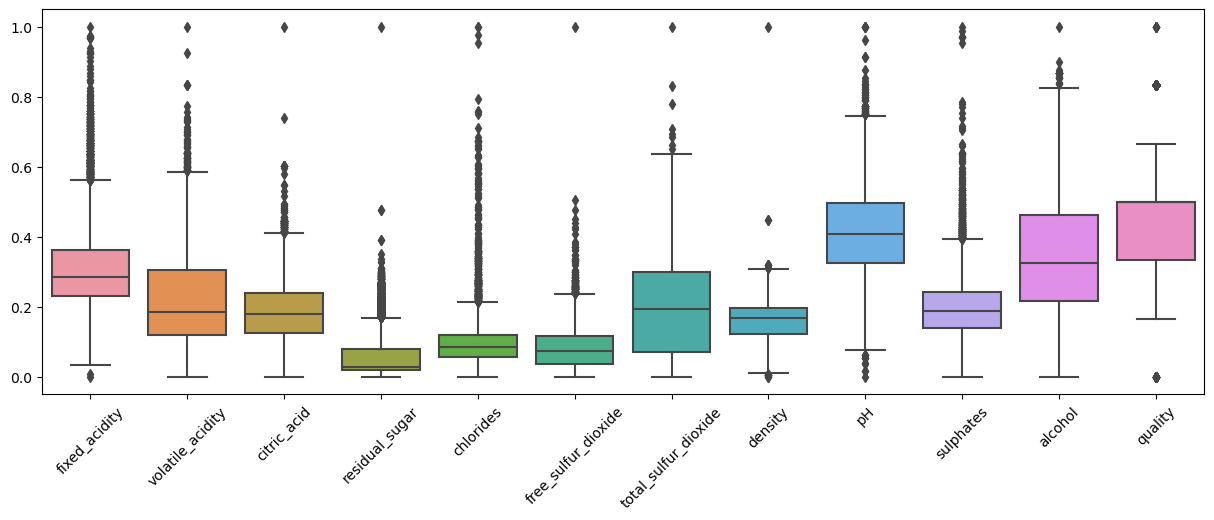

In [41]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df_normalizado)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [42]:
# Separar base de dados em treino e teste
VAR_PREDICTOR = df_padronizado
VAR_TARGET = y_bal
from sklearn.model_selection import train_test_split as tts
X_tr, X_ts, y_tr, y_ts = tts(VAR_PREDICTOR,VAR_TARGET, test_size= 0.3)
X_tr.shape, X_ts.shape, y_tr.shape, y_ts.shape, y_tr.value_counts()[0], y_tr.value_counts()[1]

((6857, 12), (2939, 12), (6857,), (2939,), 3426, 3431)

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Extra Trees Classifier
        </b>
    <br/>&nbsp;
</center>

[ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)

In [43]:
# Treinar o modelo
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=500, max_depth=10, n_jobs=-1)
etc.fit(X_tr, y_tr)

ExtraTreesClassifier(max_depth=10, n_estimators=500, n_jobs=-1)

In [44]:
# PROPENSÃO respectiva, nas colunas, da variável resposta ser 0 e 1
etc.predict_proba(X_ts)

array([[0.04029339, 0.95970661],
       [0.08017755, 0.91982245],
       [0.93358819, 0.06641181],
       ...,
       [0.08960773, 0.91039227],
       [0.98393158, 0.01606842],
       [0.89209291, 0.10790709]])

In [45]:
pd.DataFrame(etc.predict_proba(X_ts), columns=['Propensão 0', 'Propensão 1']).head()

,Propensão 0,Propensão 1
0,0.040293,0.959707
1,0.080178,0.919822
2,0.933588,0.066412
3,0.023137,0.976863
4,0.988948,0.011052


In [46]:
etc_y_pred = etc.predict(X_ts)

# EVALUATION

In [47]:
# Max e Min
etc_y_pred.min(), etc_y_pred.max()

(0, 1)

In [48]:
# Curva ROC
roc_auc_score(y_ts, etc_y_pred)

0.99626242924039

In [49]:
# SCORE
etc_acuracia = etc.score(X_ts, y_ts)
print("score AUTO:", etc_acuracia)

score AUTO: 0.9962572303504593


In [50]:
# ACURÁCIA
etc_acuracia = accuracy_score(y_ts, etc_y_pred)
print("accuracy_score AUTO:", etc_acuracia)

accuracy_score AUTO: 0.9962572303504593


In [51]:
# MATRIZ CONFUSÃO
etc_confusion_matrix = confusion_matrix(y_ts, etc_y_pred)
etc_confusion_matrix

array([[1462,   10],
       [   1, 1466]], dtype=int64)

|                     | negativo PRED 0    |    positivo PRED 1   |
|-                    |--------------------|----------------------|
| *negativo REAL 0*   |      VN            |             FP       |
| *positivo REAL 1*   |      FN            |             VP       |

In [52]:
# CÁLCULO MANUAL DA ACURÁCIA
etc_acuracia_manual = (etc_confusion_matrix[0][0] + etc_confusion_matrix[1][1])/(etc_confusion_matrix[0][0] + etc_confusion_matrix[0][1] + etc_confusion_matrix[1][0] + etc_confusion_matrix[1][1])
print(f'Acurácia MANUAL:, {etc_acuracia_manual}')

Acurácia MANUAL:, 0.9962572303504593


In [53]:
print(classification_report(y_ts, etc_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1472
           1       0.99      1.00      1.00      1467

    accuracy                           1.00      2939
   macro avg       1.00      1.00      1.00      2939
weighted avg       1.00      1.00      1.00      2939



In [54]:
etc_f1_score = f1_score(y_ts, etc_y_pred)
etc_f1_score

0.9962623173632348

In [55]:
X_ts[400:413].T

,572,2203,1632,255,5301,3,943,1962,3677,7870,3804,5197,1909
fixed_acidity,1.761439,-0.860945,-0.928185,0.282146,-0.054057,2.433846,1.492477,-0.188538,-1.129907,0.263735,0.080424,-1.197148,-0.995426
volatile_acidity,-0.889162,-0.780751,-1.539629,0.899622,-0.889162,-0.672340,0.520183,-0.997573,-1.268601,-0.325960,-0.076079,-1.105984,-0.238695
citric_acid,1.196545,1.196545,0.245565,-0.451821,0.055369,1.640336,0.245565,0.435761,-0.008030,0.761694,0.245565,-0.388422,-0.198226
residual_sugar,-0.488678,-0.703990,-0.703990,-0.297289,2.071145,-0.608295,-0.512601,2.358228,-0.727913,-0.442320,1.329514,-0.727913,-0.560448
chlorides,0.207377,-0.374968,-0.552204,0.156738,-0.425607,0.207377,0.688445,-0.096455,-0.628162,0.810520,-0.273691,-0.856037,-0.805398
free_sulfur_dioxide,-0.905435,0.495982,1.021514,-0.496688,0.028843,-0.496688,-0.905435,1.313476,-0.029549,-1.022220,0.554375,2.306146,-0.555081
total_sulfur_dioxide,-1.076393,0.700093,0.415185,0.448703,1.471021,-0.540095,-0.791485,1.655373,0.448703,-1.260745,1.437502,1.286669,0.130277
density,0.861627,-1.067756,-0.531816,0.486469,1.233212,0.933085,1.161753,0.861627,-0.817651,0.710052,0.718710,-1.771623,-1.317861
pH,-0.695548,-1.645886,1.078417,0.064723,-1.265751,-0.568836,-0.061989,-2.279445,2.725670,0.499801,0.064723,2.155467,0.951705
sulphates,0.231560,0.231560,-0.402246,-0.021962,-0.275484,0.041419,0.168180,-1.226193,0.928747,1.250119,0.168180,-0.085343,0.865366


In [56]:
selection_y_ts = list(y_ts[400:410].values)
selection_y_ts

[0, 1, 1, 0, 1, 0, 0, 1, 1, 0]

In [57]:
prediction = list(etc.predict(X_ts[400:410]))
print(prediction)

[0, 1, 1, 0, 1, 0, 0, 1, 1, 0]


In [58]:
if (selection_y_ts != prediction): 
    # imprimir dataframe com PREVISÃO diferente da variável real de referência
    resultados = []
    for i, (a, b) in enumerate(zip(selection, prediction)):
        if a != b:
    #         print(f"Posição {i}: {a} != {b}")
            resultados.append([i, a, b])
    dfp = pd.DataFrame(resultados, columns=["seq", "selection", "prediction"])
    display (dfp)
    display (dfp.predictio.value_counts())
else:
    print(f'O modelo previu corretamente os resultados em relação a variável "y_ts"')
    print(list(set(selection_y_ts) - set(prediction)))

O modelo previu corretamente os resultados em relação a variável "y_ts"
[]


# VISUAL

In [59]:
# PROPENSÃO (NÃO É probabilidade)
pred = etc.predict_proba(X_ts)[:,1]

In [60]:
pred.min(), pred.max()

(0.003375014299836931, 0.995571538324551)

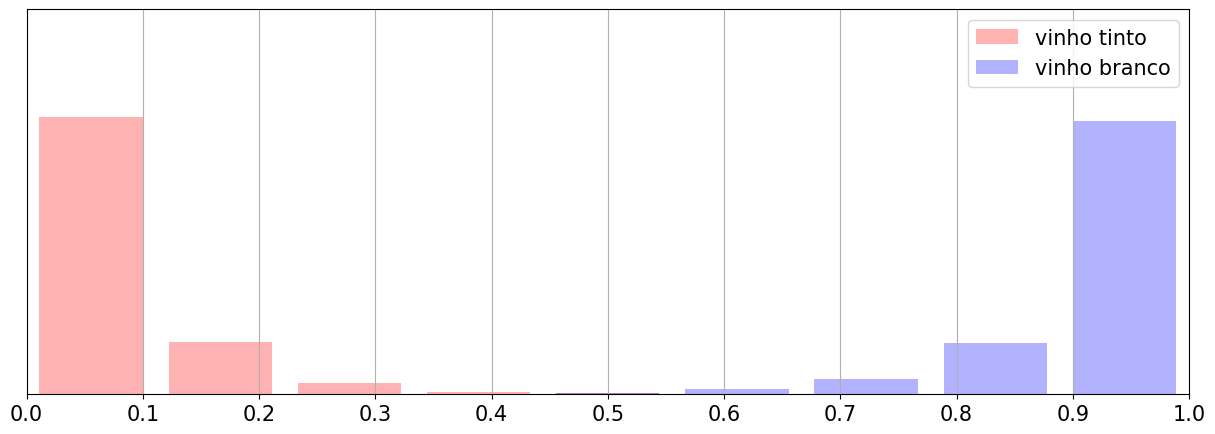

In [61]:
plt.figure(figsize=(15,5))
plt.hist(pred[y_ts==0], bins=np.linspace(0,1,10), density=True, color='r', alpha=.3, rwidth=.8, label='vinho tinto')
plt.hist(pred[y_ts==1], bins=np.linspace(0,1,10), density=True, color='b', alpha=.3, rwidth=.8, label='vinho branco')

plt.xlim(0, 1)
plt.ylim(0, 10)

plt.xticks(np.arange(0,1.1,0.1), fontsize=15)
plt.yticks([])
plt.legend(fontsize=15)
plt.grid();

# PERSISTENCE

In [62]:
# Salvar
# joblib.dump(etc, r'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\wine_classifier_etc.joblib')

In [63]:
# Carregar Modelo Salvo
# model = joblib.load(r'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\wine_classifier_etc.joblib')
# prediction_persistence = model.predict(X_ts[400:410])
# print(list(prediction_persistence))

# DEPLOYMENT

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            KNeighbors Classifier
        </b>
    <br/>&nbsp;
</center>

[KNeighbors Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [64]:
# Treinar o modelo
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_tr, y_tr)

KNeighborsClassifier(n_neighbors=3)

In [65]:
neigh_y_pred = neigh.predict(X_ts)

In [66]:
# MATRIZ CONFUSÃO
neigh_confusion_matrix = confusion_matrix(y_ts, neigh_y_pred)
neigh_confusion_matrix

array([[1466,    6],
       [  12, 1455]], dtype=int64)

In [67]:
# ACURÁCIA
neigh_acuracia = accuracy_score(y_ts, neigh_y_pred)
print("Acurácia:", neigh_acuracia)

Acurácia: 0.9938754678462062


In [68]:
print(classification_report(y_ts, neigh_y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1472
           1       1.00      0.99      0.99      1467

    accuracy                           0.99      2939
   macro avg       0.99      0.99      0.99      2939
weighted avg       0.99      0.99      0.99      2939



In [69]:
neigh_f1_score = f1_score(y_ts, neigh_y_pred)
neigh_f1_score

0.9938524590163934

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Decision Tree Classifier
        </b>
    <br/>&nbsp;
</center>

[Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [70]:
# Treinar o modelo
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_tr, y_tr)

DecisionTreeClassifier()

In [71]:
dtc_y_pred = dtc.predict(X_ts)

In [72]:
# MATRIZ CONFUSÃO
dtc_confusion_matrix = confusion_matrix(y_ts, dtc_y_pred)
dtc_confusion_matrix

array([[1458,   14],
       [  14, 1453]], dtype=int64)

In [73]:
# ACURÁCIA
dtc_acuracia = accuracy_score(y_ts, dtc_y_pred)
print("Acurácia:", dtc_acuracia)

Acurácia: 0.9904729499829874


In [74]:
print(classification_report(y_ts, dtc_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1472
           1       0.99      0.99      0.99      1467

    accuracy                           0.99      2939
   macro avg       0.99      0.99      0.99      2939
weighted avg       0.99      0.99      0.99      2939



In [75]:
dtc_f1_score = f1_score(y_ts, dtc_y_pred)
dtc_f1_score

0.9904567143830948

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Logistic Regression
        </b>
    <br/>&nbsp;
</center>

[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [76]:
# Treinar o modelo
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, max_iter =1500)
lr.fit(X_tr, y_tr)

LogisticRegression(max_iter=1500, random_state=0)

In [77]:
lr_y_pred = lr.predict(X_ts)

In [78]:
# MATRIZ CONFUSÃO
lr_confusion_matrix = confusion_matrix(y_ts, lr_y_pred)
lr_confusion_matrix

array([[1462,   10],
       [   8, 1459]], dtype=int64)

In [79]:
# ACURÁCIA
lr_acuracia = accuracy_score(y_ts, lr_y_pred)
print("Acurácia:", lr_acuracia)

Acurácia: 0.9938754678462062


In [80]:
print(classification_report(y_ts, lr_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1472
           1       0.99      0.99      0.99      1467

    accuracy                           0.99      2939
   macro avg       0.99      0.99      0.99      2939
weighted avg       0.99      0.99      0.99      2939



In [81]:
lr_f1_score = f1_score(y_ts, lr_y_pred)
lr_f1_score

0.9938692098092642

In [82]:
selection_y_ts

[0, 1, 1, 0, 1, 0, 0, 1, 1, 0]

In [83]:
prediction = list(lr.predict(X_ts[400:410]))
print(prediction)

[0, 1, 1, 0, 1, 0, 0, 1, 1, 0]


<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Random Forest Classifier
        </b>
    <br/>&nbsp;
</center>

[Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1_000, max_depth=8, n_jobs=-1)
rf.fit(X_tr, y_tr)

RandomForestClassifier(max_depth=8, n_estimators=1000, n_jobs=-1)

In [85]:
rf_y_pred = lr.predict(X_ts)

In [86]:
# MATRIZ CONFUSÃO
rf_confusion_matrix = confusion_matrix(y_ts, rf_y_pred)
rf_confusion_matrix

array([[1462,   10],
       [   8, 1459]], dtype=int64)

In [87]:
# ACURÁCIA
rf_acuracia = accuracy_score(y_ts, rf_y_pred)
print("Acurácia:", rf_acuracia)

Acurácia: 0.9938754678462062


In [88]:
print(classification_report(y_ts, rf_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1472
           1       0.99      0.99      0.99      1467

    accuracy                           0.99      2939
   macro avg       0.99      0.99      0.99      2939
weighted avg       0.99      0.99      0.99      2939



In [89]:
rf_f1_score = f1_score(y_ts, lr_y_pred)
rf_f1_score

0.9938692098092642

<center style="font-size:18pt; background-color:#DF1C44">
    <br/>
        <b style="color: #ffffff">
            Avaliação geral de todos os Modelos
        </b>
    <br/>&nbsp;
</center>

In [90]:
dfm = {
    'modelo':['Extra Trees Classifier', 'KNeighbors Classifier', 'Decision Tree Classifier',
              'Logistic Regression', 'Random Forest Classifier'],
    'acurácia':[etc_acuracia,neigh_acuracia,dtc_acuracia,lr_acuracia, rf_acuracia],
    'f1_score':[etc_f1_score,neigh_f1_score,dtc_f1_score,lr_f1_score, rf_f1_score]
    }    
modelos = pd.DataFrame(dfm)

In [91]:
# modelos.sort_values('f1_score', ascending=False)
modelos.style.highlight_max(subset=['acurácia','f1_score'])

,modelo,acurácia,f1_score
0,Extra Trees Classifier,0.996257,0.996262
1,KNeighbors Classifier,0.993875,0.993852
2,Decision Tree Classifier,0.990473,0.990457
3,Logistic Regression,0.993875,0.993869
4,Random Forest Classifier,0.993875,0.993869
